In [1]:
#导入必要的包
import numpy as np
import scipy
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score


In [2]:
#计算距离矩阵 欧氏距离
def euclidDistance(x1, x2, sqrt_flag=False):
    res = np.sum((x1-x2)**2)
    if sqrt_flag:
        res = np.sqrt(res)
    return res

In [3]:
def DistanceMatrix(X):
    X = np.array(X)
    S = np.zeros((len(X), len(X)))
    for i in range(len(X)):
        for j in range(i+1, len(X)):
            S[i][j] = 1.0 * euclidDistance(X[i], X[j])
            S[j][i] = S[i][j]
    return S

In [18]:
#利用KNN计算邻接矩阵 A
def myKNN(S, k, sigma=3):
    N = len(S)
    A = np.zeros((N,N))

    for i in range(N):
        dist_with_index = zip(S[i], range(N))
        dist_with_index = sorted(dist_with_index, key=lambda x:x[0])
        neighbours_id = [dist_with_index[m][1] for m in range(k+1)] # xi's k nearest neighbours

        for j in neighbours_id: # x【j】 is x【i】's neighbour
            A[i][j] = np.exp(-S[i][j]/2/sigma/sigma)
            A[j][i] = A[i][j] # mutually
    return A

In [19]:
#标准化的拉普拉斯矩阵
#由A计算度矩阵D和拉普拉斯矩阵L
def laplacian(A):
    D = np.zeros(A.shape)
    w = np.sum(A, axis=0)
    D.flat[::len(w) + 1] = w ** (-0.5)  # set the diag of D to w
    return D.dot(A).dot(D)

In [20]:
#k-means
def k_means(X, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=2)
    return kmeans.fit(X).labels_

In [21]:
#谱聚类
def spectral_clustering(affinity, n_clusters, cluster_method=k_means):
    L = laplacian(affinity)
    eig_val, eig_vect = scipy.sparse.linalg.eigs(L, n_clusters)
    X = eig_vect.real
    rows_norm = np.linalg.norm(X, axis=1, ord=2)
    Y = (X.T / rows_norm).T
    labels = cluster_method(Y, n_clusters)
    return labels

In [22]:
#引入数据集  
import matplotlib.pyplot as plt
from sklearn import datasets
if __name__ == '__main__':
    iris = datasets.load_iris()
    data = np.array(iris.data)
    lable = np.array(iris.target)
    Similarity = DistanceMatrix(data)
    Adjacent = myKNN(Similarity, k=10)
    Laplacian = laplacian(Adjacent)
    x, V = np.linalg.eig(Laplacian)
    x = zip(x, range(len(x)))
    x = sorted(x, key=lambda x:x[0])
    H = np.vstack([V[:,i] for (v, i) in x[:800]]).T
    sp_kmeans = k_means(H,n_clusters=3)
    pure_kmeans = k_means(data,n_clusters=3)

In [23]:
#准确率
score_pure = accuracy_score(lable,pure_kmeans)
print(score_pure)

0.8933333333333333


In [24]:
'''
#预测可视化
for i in range(len(data)):
    if pure_kmeans[i] == 0:
        plt.scatter(data[i,0], data[i,1],c="w", edgecolors='k', marker="v")
    elif pure_kmeans[i] == 1:
        plt.scatter(data[i,0], data[i,1], c="w", edgecolors='k', marker="s")
    else:
        plt.scatter(data[i,0], data[i,1], c="w", edgecolors='k', marker="o")    
'''      
#print(sp_kmeans)
#score_sp = accuracy_score(lable,sp_kmeans)
#print(score_sp)
#print(pure_kmeans)

'\n#预测可视化\nfor i in range(len(data)):\n    if pure_kmeans[i] == 0:\n        plt.scatter(data[i,0], data[i,1],c="w", edgecolors=\'k\', marker="v")\n    elif pure_kmeans[i] == 1:\n        plt.scatter(data[i,0], data[i,1], c="w", edgecolors=\'k\', marker="s")\n    else:\n        plt.scatter(data[i,0], data[i,1], c="w", edgecolors=\'k\', marker="o")    \n'

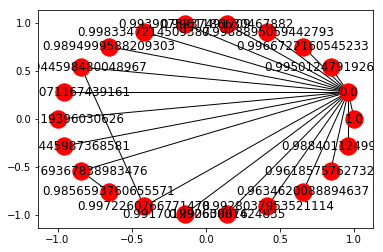

In [25]:
#邻接矩阵绘制无向图
import networkx as nx

G=nx.Graph()
edglist=[]
N = Adjacent
for i in range(150):
  for j in range(1,4):
    edglist.append((N[i][0],N[i][j]))
G=nx.Graph(edglist)
position = nx.circular_layout(G)
nx.draw_networkx_nodes(G,position,node_color="r")
nx.draw_networkx_edges(G,position)
nx.draw_networkx_labels(G,position)
plt.show()


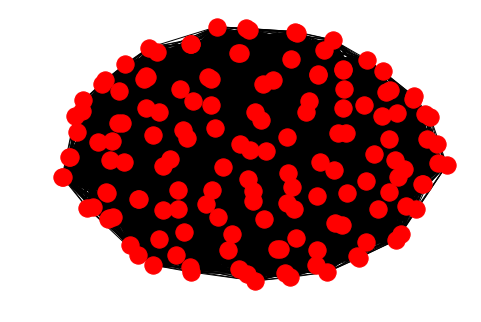

In [26]:
G = nx.Graph()
Matrix = np.array(Adjacent)
for i in range(len(Matrix)):
    for j in range(len(Matrix)):
        G.add_edge(i, j)
 
nx.draw(G)
plt.show()